In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

im gonna load the dataset now

In [2]:
data = pd.read_csv('manufacturing.csv')
print("Dataset Overview:")
print(data.head())


Dataset Overview:
   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


data analysis

In [3]:
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB
None

Missing Values:
Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64


visualizing

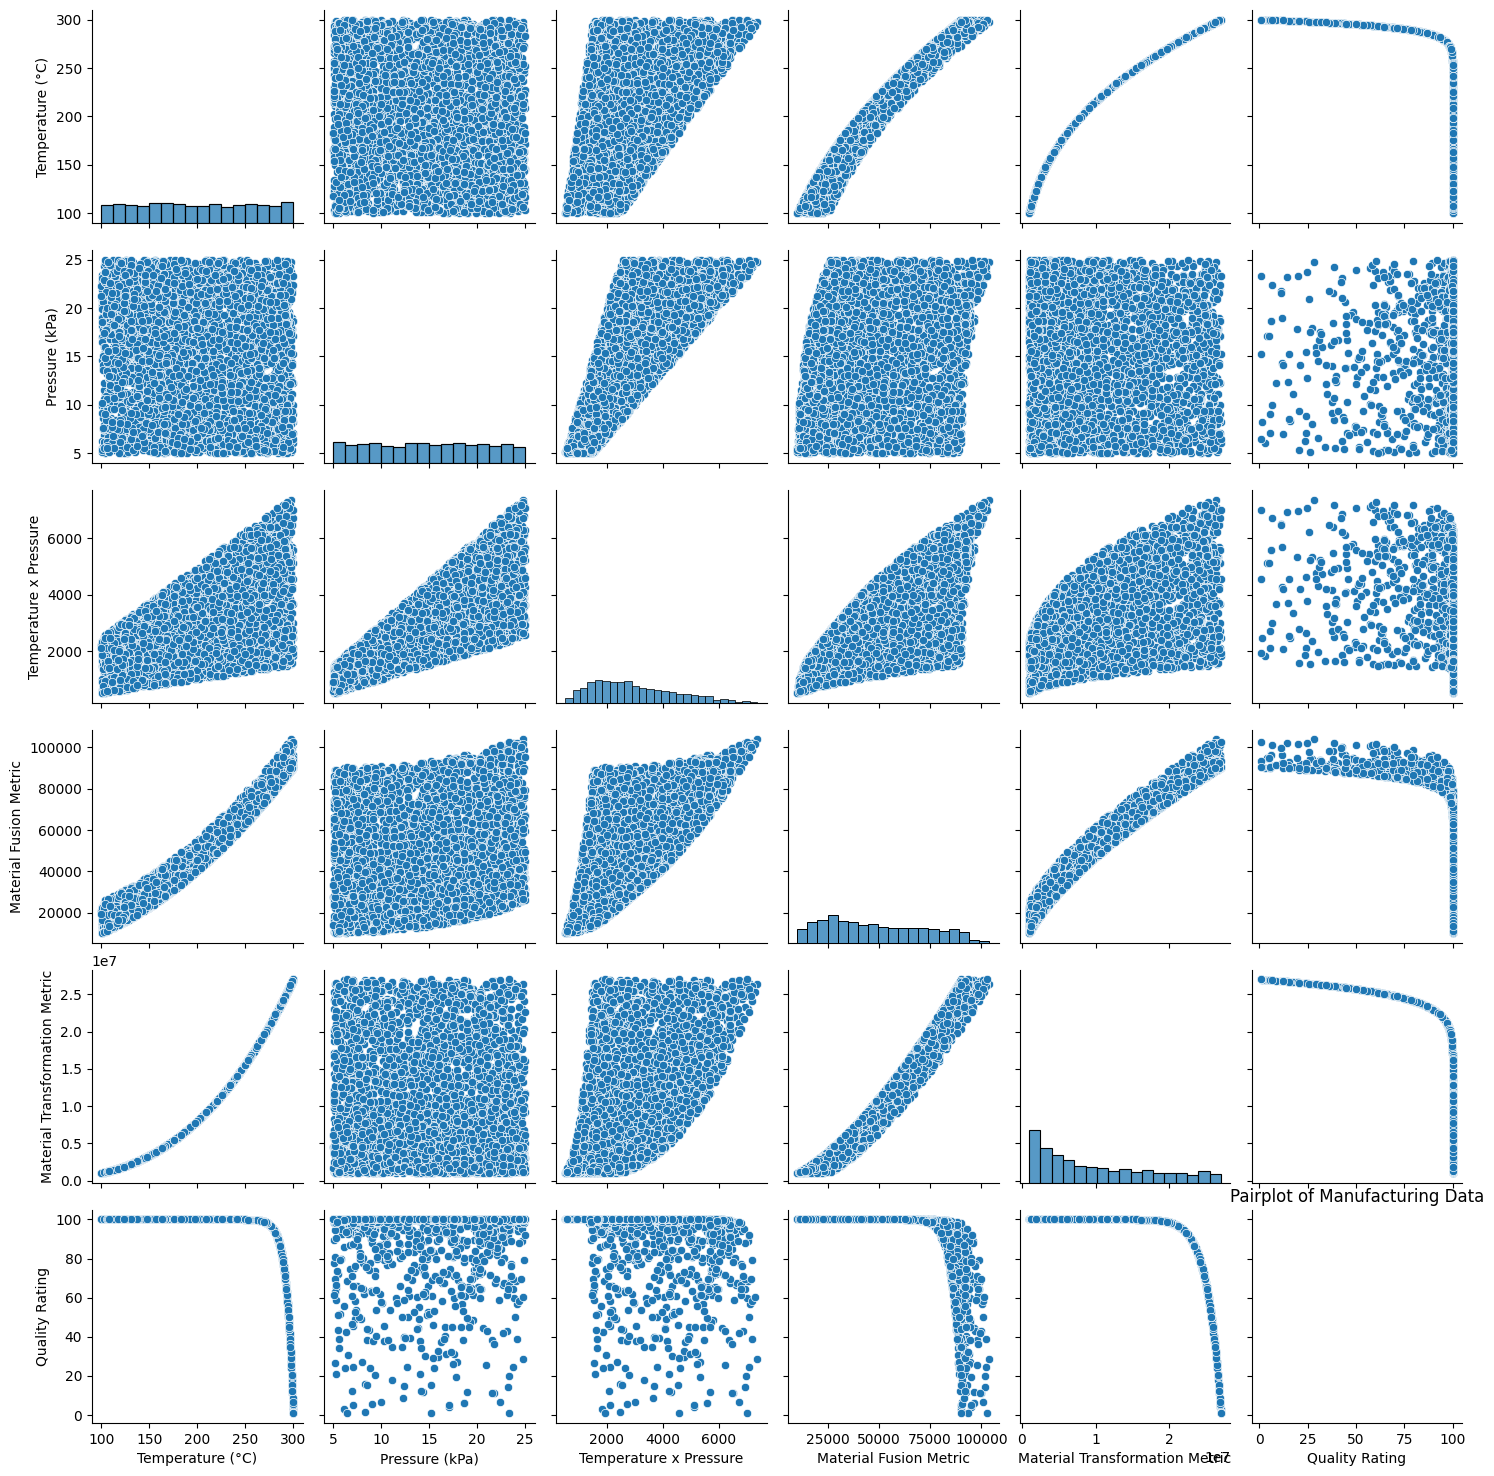

In [4]:
sns.pairplot(data)
plt.title('Pairplot of Manufacturing Data')
plt.show()

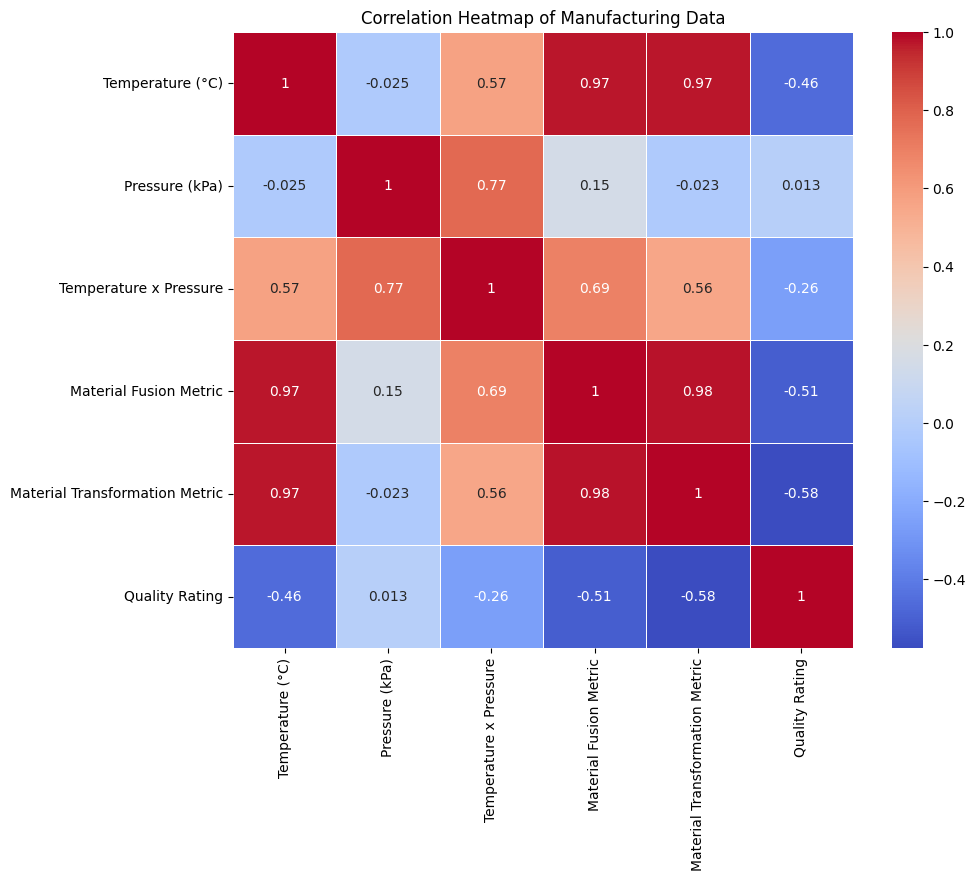

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Manufacturing Data")
plt.show()


data preprocessing

In [7]:
X = data.drop(columns=['Quality Rating'])
y = data['Quality Rating']

standartizing

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

polynomial features

In [10]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

training the model

In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet()
}

parameter optimization for regulization of the model

In [14]:
params = {
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10]},
    'Elastic Net Regression': {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
}
print(params)


{'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10]}, 'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10]}, 'Elastic Net Regression': {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}}


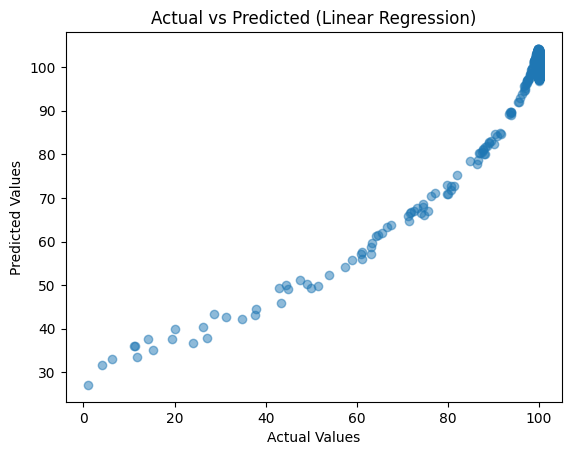

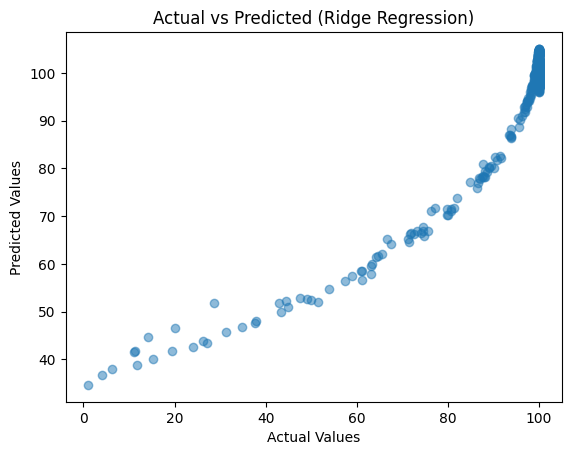

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+04, tolerance: 4.000e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+04, tolerance: 4.049e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+04, tolerance: 3.904e

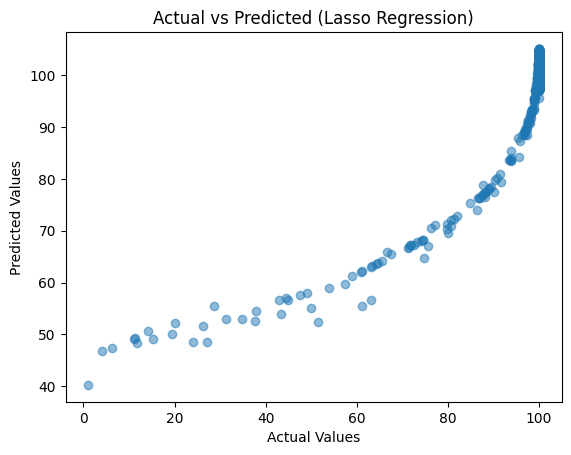

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+03, tolerance: 4.000e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+03, tolerance: 4.049e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.365e+03, tolerance: 3.904e

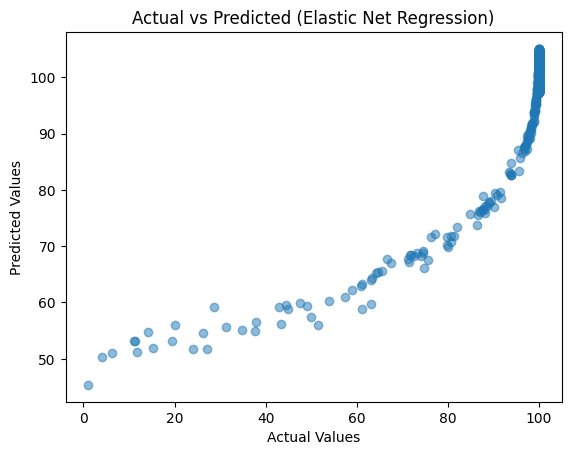

In [21]:
results = {}
for name, model in models.items():
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='r2')
        grid_search.fit(X_train_poly, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(X_train_poly, y_train)

    y_pred = best_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store predictions along with MSE and R2
    results[name] = {"MSE": mse, "R2": r2, "predictions": y_pred}

    # Визуализация предсказаний
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted ({name})")
    plt.show()

In [22]:
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Linear Regression: MSE=15.0277, R2=0.9264
Ridge Regression: MSE=22.2306, R2=0.8911
Lasso Regression: MSE=34.6043, R2=0.8305
Elastic Net Regression: MSE=41.9956, R2=0.7943


1. Linear Regression (Baseline Model)
MSE = 15.03, R² = 0.9264: This means the model explains 92.64% of the variance in the target variable. A lower MSE indicates better fit.

Since there's no regularization, the model captures more details from the data, including noise.

2. Ridge Regression (L2 Regularization)
MSE = 22.23, R² = 0.8911: Ridge regression adds an L2 penalty, which helps prevent overfitting but slightly increases MSE.

The drop in R² indicates that Ridge penalized some of the feature weights, leading to a slightly less accurate model but potentially more generalizable.

3. Lasso Regression (L1 Regularization)
MSE = 34.60, R² = 0.8305: Lasso regression penalizes coefficients and can shrink some to zero, effectively performing feature selection.

The decrease in R² suggests that some important features were shrunk too much, which might have hurt model performance.

4. Elastic Net Regression (Combination of L1 and L2)
MSE = 41.99, R² = 0.7943: Elastic Net balances Ridge and Lasso penalties.

The highest MSE and lowest R² indicate that the selected alpha and l1_ratio values may not be optimal, or the dataset favors pure Linear Regression.

 Histogram of Prediction Errors

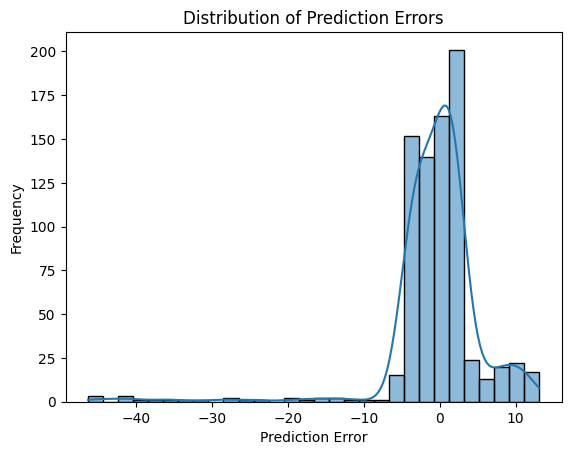

In [23]:
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

Feature Importance Plot (for Lasso)

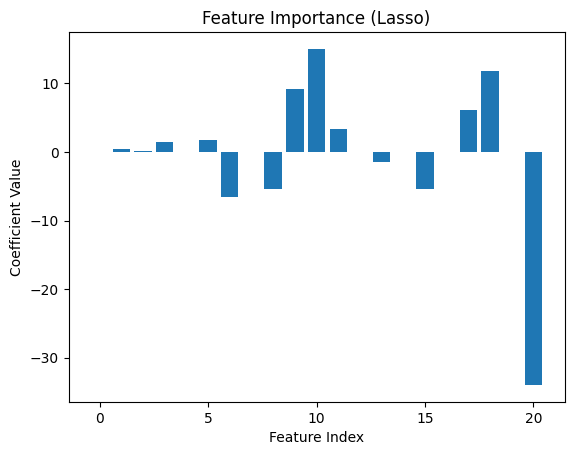

In [24]:
importance = best_model.coef_
plt.bar(range(len(importance)), importance)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Lasso)")
plt.show()


Boxplot of Prediction Errors Across Models

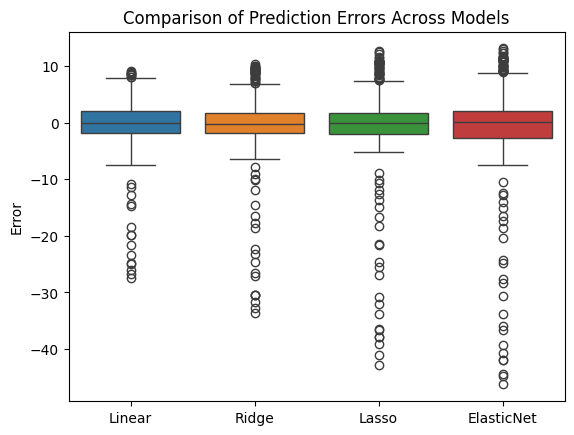

In [26]:
errors_dict = {
    "Linear": y_test - results["Linear Regression"]["predictions"],
    "Ridge": y_test - results["Ridge Regression"]["predictions"],
    "Lasso": y_test - results["Lasso Regression"]["predictions"],
    "ElasticNet": y_test - results["Elastic Net Regression"]["predictions"] # Add a space in 'Elastic Net Regression'
}
errors_df = pd.DataFrame(errors_dict)
sns.boxplot(data=errors_df)
plt.title("Comparison of Prediction Errors Across Models")
plt.ylabel("Error")
plt.show()